In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns

In [5]:
df=pd.read_csv("GroceryStoreDataSet.csv")
df    # it considers first row as col. name, in this file col name is not given

,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


In [17]:
df1=pd.read_csv("GroceryStoreDataSet.csv", header=None) # Hence using header = none
df1.columns= ["List"]
df1

,List
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [24]:
sep_df= [x.split(",") for x in df1["List"]]
sep_df

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [27]:
encod=TransactionEncoder()
encod_df= encod.fit(sep_df).transform(sep_df)

In [26]:
encod_df

array([[ True, False,  True, False, False, False, False, False,  True,
        False, False],
       [ True, False,  True, False, False,  True, False, False,  True,
        False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False,  True],
       [False, False,  True, False, False, False,  True,  True,  True,
        False, False],
       [ True, False, False, False, False, False, False,  True, False,
        False,  True],
       [False,  True,  True, False, False, False, False, False, False,
        False,  True],
       [False, False, False, False, False,  True, False,  True, False,
        False,  True],
       [ True, False,  True, False, False, False, False,  True, False,
        False,  True],
       [False, False,  True, False, False, False,  True,  True, False,
        False,  True],
       [False, False,  True, False, False, False, False, False,  True,
        False, False],
       [ True, False, False,  True,  True,  True, False, Fal

In [32]:
encoded_df=pd.DataFrame(encod_df, columns= encod.columns_)
encoded_df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [38]:
freq_items= apriori(df= encoded_df, min_support=0.1, use_colnames=True)
freq_items.head(20)

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)
5,0.30,(CORNFLAKES)
6,0.10,(JAM)
7,0.25,(MAGGI)
8,0.25,(MILK)
9,0.30,(SUGER)


In [39]:
rule= association_rules(df=freq_items, metric="lift", min_threshold= 0.7)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BREAD),(BISCUIT),0.65,0.35,0.2,0.307692,0.879121,-0.0275,0.938889
1,(BISCUIT),(BREAD),0.35,0.65,0.2,0.571429,0.879121,-0.0275,0.816667
2,(COCK),(BISCUIT),0.15,0.35,0.1,0.666667,1.904762,0.0475,1.950000
3,(BISCUIT),(COCK),0.35,0.15,0.1,0.285714,1.904762,0.0475,1.190000
4,(BISCUIT),(COFFEE),0.35,0.40,0.1,0.285714,0.714286,-0.0400,0.840000
...,...,...,...,...,...,...,...,...,...
115,"(BISCUIT, COFFEE)","(COCK, CORNFLAKES)",0.10,0.10,0.1,1.000000,10.000000,0.0900,inf
116,(COCK),"(CORNFLAKES, BISCUIT, COFFEE)",0.15,0.10,0.1,0.666667,6.666667,0.0850,2.700000
117,(CORNFLAKES),"(COCK, BISCUIT, COFFEE)",0.30,0.10,0.1,0.333333,3.333333,0.0700,1.350000
118,(BISCUIT),"(COCK, CORNFLAKES, COFFEE)",0.35,0.10,0.1,0.285714,2.857143,0.0650,1.260000


In [40]:
rule.sort_values("lift", ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
115,"(BISCUIT, COFFEE)","(COCK, CORNFLAKES)",0.10,0.10,0.1,1.000000,10.000000,0.090,inf
110,"(COCK, CORNFLAKES)","(BISCUIT, COFFEE)",0.10,0.10,0.1,1.000000,10.000000,0.090,inf
109,"(CORNFLAKES, BISCUIT, COFFEE)",(COCK),0.10,0.15,0.1,1.000000,6.666667,0.085,inf
54,"(BISCUIT, COFFEE)",(COCK),0.10,0.15,0.1,1.000000,6.666667,0.085,inf
55,(COCK),"(BISCUIT, COFFEE)",0.15,0.10,0.1,0.666667,6.666667,0.085,2.700000
...,...,...,...,...,...,...,...,...,...
85,(BREAD),"(SUGER, COFFEE)",0.65,0.20,0.1,0.153846,0.769231,-0.030,0.945455
96,"(MAGGI, TEA)",(BREAD),0.20,0.65,0.1,0.500000,0.769231,-0.030,0.700000
84,"(SUGER, COFFEE)",(BREAD),0.20,0.65,0.1,0.500000,0.769231,-0.030,0.700000
5,(COFFEE),(BISCUIT),0.40,0.35,0.1,0.250000,0.714286,-0.040,0.866667


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

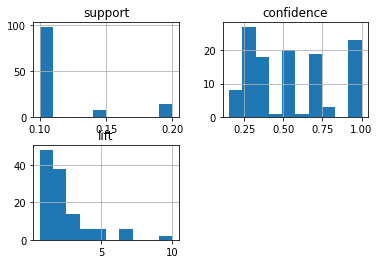

In [41]:
rule[["support", "confidence", "lift"]].hist()

In [44]:
rule[(rule.lift>=5) &  (rule.confidence>= 0.6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
54,"(BISCUIT, COFFEE)",(COCK),0.10,0.15,0.1,1.000000,6.666667,0.085,inf
55,(COCK),"(BISCUIT, COFFEE)",0.15,0.10,0.1,0.666667,6.666667,0.085,2.7
88,"(BREAD, MAGGI)",(JAM),0.15,0.10,0.1,0.666667,6.666667,0.085,2.7
93,(JAM),"(BREAD, MAGGI)",0.10,0.15,0.1,1.000000,6.666667,0.085,inf
109,"(CORNFLAKES, BISCUIT, COFFEE)",(COCK),0.10,0.15,0.1,1.000000,6.666667,0.085,inf
110,"(COCK, CORNFLAKES)","(BISCUIT, COFFEE)",0.10,0.10,0.1,1.000000,10.000000,0.090,inf
111,"(COCK, BISCUIT)","(CORNFLAKES, COFFEE)",0.10,0.20,0.1,1.000000,5.000000,0.080,inf
115,"(BISCUIT, COFFEE)","(COCK, CORNFLAKES)",0.10,0.10,0.1,1.000000,10.000000,0.090,inf
116,(COCK),"(CORNFLAKES, BISCUIT, COFFEE)",0.15,0.10,0.1,0.666667,6.666667,0.085,2.7
